In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

PART 3

1. After dropping the rows with at least one missing value from the original dataframe.

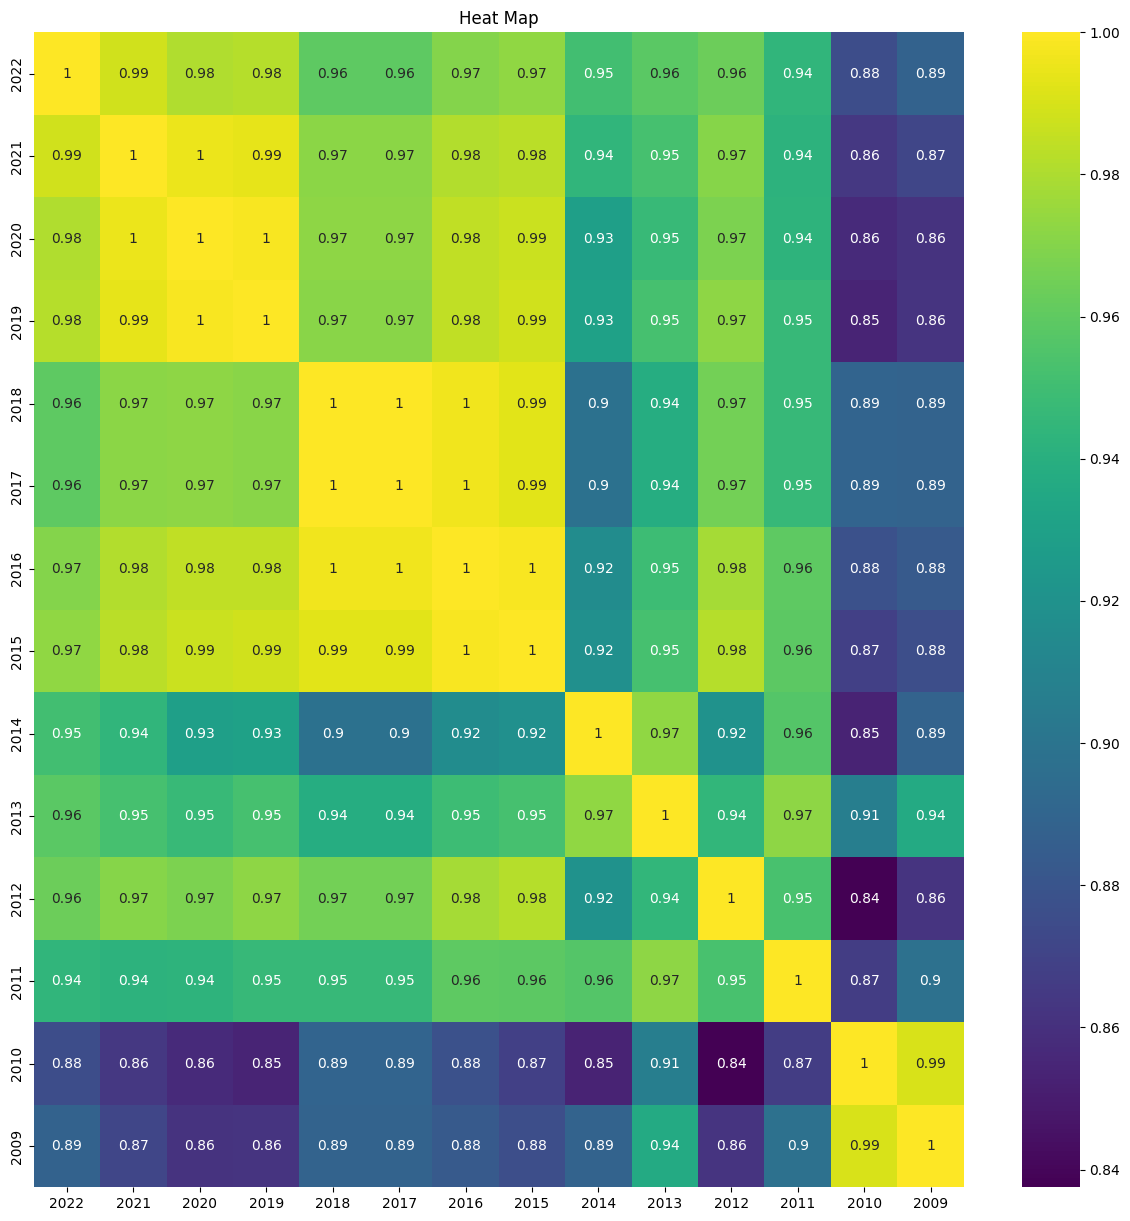

In [30]:
df1 = pd.read_csv('Punjab_Girls_Enrollment_Class11_12_By_Year.csv')
df2 = df1.dropna()
df2 = df2.drop(columns=['District'])
df2 = df2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df2,annot=True,cmap='viridis')
plt.title('Heat Map')
plt.show()

2. Without dropping the rows with missing values, impute them in the original dataframe
using the KNN approach (with your choice of number of neighbours)

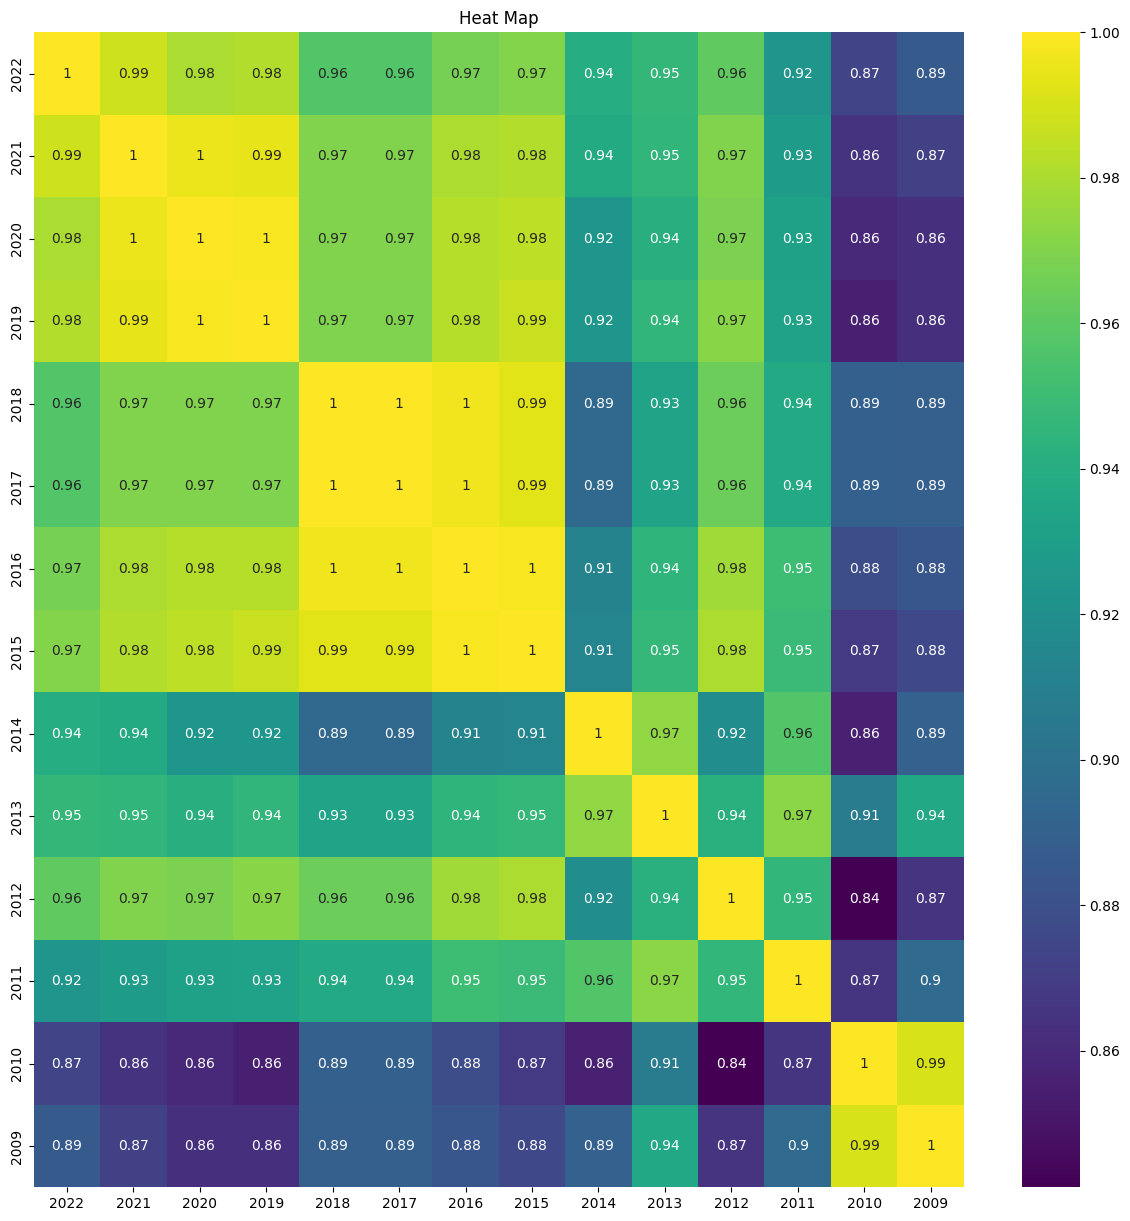

In [51]:
df3 = df1.drop(columns=['District'])
imputer = KNNImputer(n_neighbors=4)
X_imputed = imputer.fit_transform(df3)
X_imputed = pd.DataFrame(X_imputed,columns = df3.columns)
df3 = X_imputed.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df3,annot=True,cmap='viridis')
plt.title('Heat Map')
plt.show()

3. Is there any significant difference in correlations (loss of information) between the
cases of the previous two questions? Justify your answer by generating the heatmap
of the absolute difference between the respective correlations. 

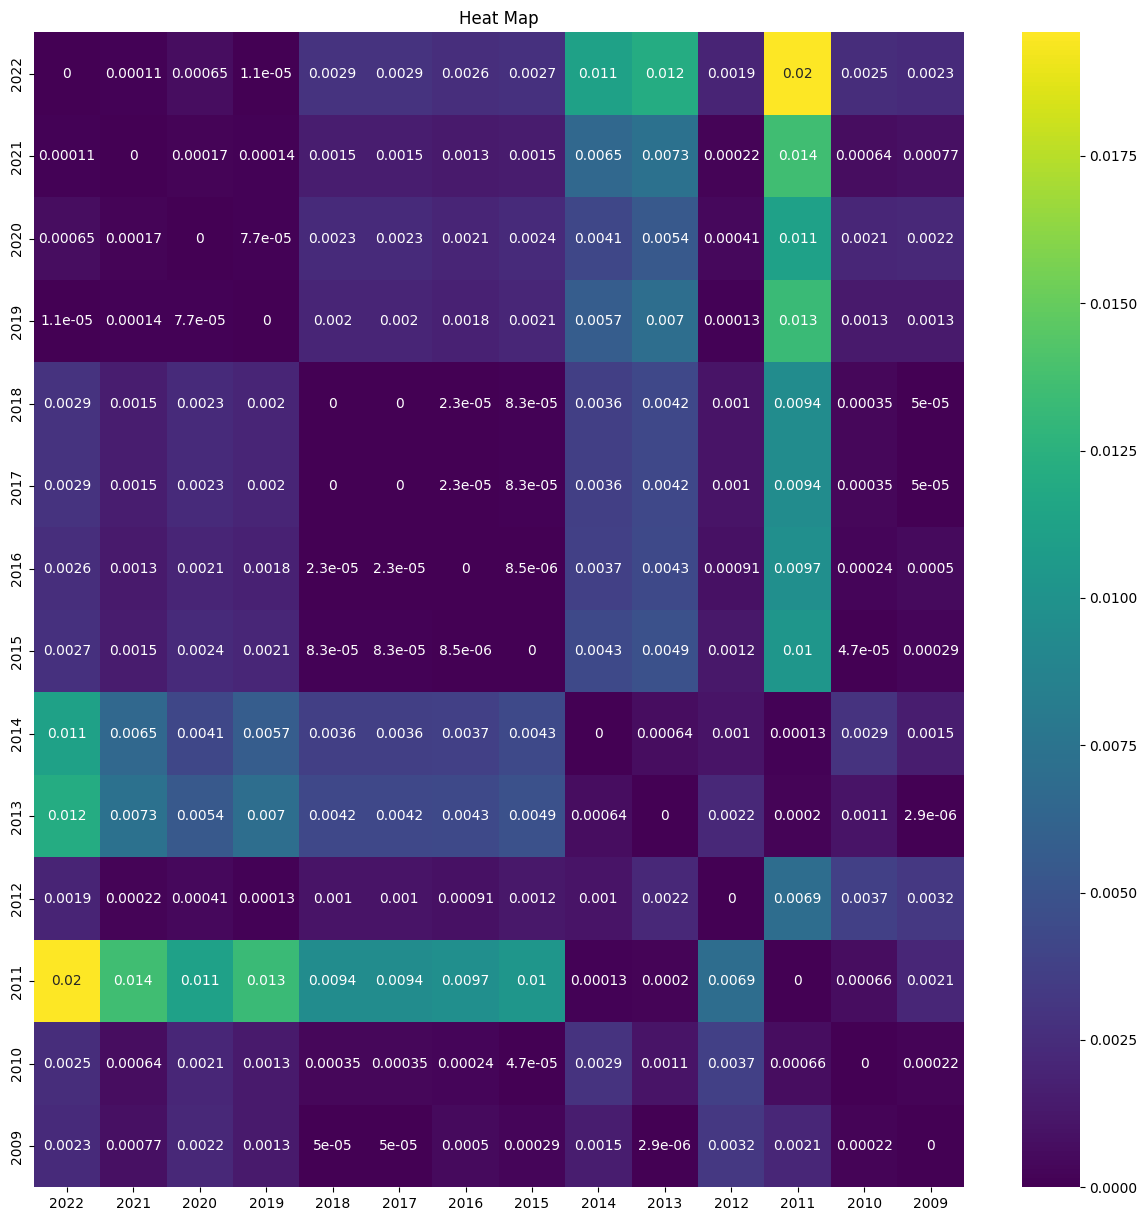

In [52]:
df4 = abs(df2-df3)

plt.figure(figsize=(15,15))
sns.heatmap(df4,annot=True,cmap='viridis')
plt.title('Heat Map')
plt.show()

PART 1

In [102]:
df = pd.read_csv('indian_food.csv')


1. Replace all values -1 in prep time with NaN.

In [103]:
df["prep_time"].replace(-1 ,np.nan , inplace =True)
df["prep_time"].isna().sum()

/tmp/ipykernel_4406/2073940961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["prep_time"].replace(-1 ,np.nan , inplace =True)


np.int64(30)

2. Select the following columns for KNN similarity:
• diet
• state

In [89]:
enc = OneHotEncoder()
new_df = pd.DataFrame(df[["diet" , "state"]])
new_df = enc.fit_transform(new_df)
new_df = pd.DataFrame(new_df.toarray() , columns = enc.get_feature_names_out(["diet" , "state"]))
new_df

,diet_non vegetarian,diet_vegetarian,state_-1,state_Andhra Pradesh,state_Assam,state_Bihar,state_Chhattisgarh,state_Goa,state_Gujarat,state_Haryana,...,state_Nagaland,state_Odisha,state_Punjab,state_Rajasthan,state_Tamil Nadu,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
new_df["prep_time"] = df["prep_time"]
new_df

,diet_non vegetarian,diet_vegetarian,state_-1,state_Andhra Pradesh,state_Assam,state_Bihar,state_Chhattisgarh,state_Goa,state_Gujarat,state_Haryana,...,state_Odisha,state_Punjab,state_Rajasthan,state_Tamil Nadu,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,prep_time
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
252,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
253,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [91]:
imputer = KNNImputer(n_neighbors =3)
new_df = imputer.fit_transform(new_df)
new_df = pd.DataFrame(new_df)

df["prep_time"] = new_df.iloc[:,-1]
df.head(21)


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10.0,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10.0,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10.0,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20.0,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10.0,40,sweet,dessert,-1,-1


PART 2

In [84]:
df5 = pd.read_csv('PGI.csv')
df5 = df5.drop(columns=['State' , 'District' , 'Grade'])

In [111]:

imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

imp_mean.fit(df5)
meann = imp_mean.transform(df5)
meann = pd.DataFrame(meann , columns = df5.columns)

meann["Overall"].mean()

np.float64(269.4866562009419)

In [114]:
imp_mode.fit(df5)
modee = imp_mode.transform(df5)
modee = pd.DataFrame(modee , columns = df5.columns)
modee["Overall"].mean()



np.float64(262.5807291666667)

In [116]:
imp_median.fit(df5)
median = imp_median.transform(df5)
median = pd.DataFrame(median , columns = df5.columns)

median["Overall"].mean()

np.float64(269.4036458333333)

In [104]:
mean['Overall'].agg("mean")

NameError: name 'mean' is not defined

In [118]:
df5.groupby(by="State").mean()
    

KeyError: 'State'